<a href="https://colab.research.google.com/github/nattntn/EfficientNet_Regression_Deeptooth/blob/main/20_Eff_Regress_Predict_Unfreeze_250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Clone Efficient

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 7.80 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load model

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Eff_Regress/20_Re_8e-7_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Eff_Regress/20_Re_8e-7_250_Unfreeze.h5')
height = width = model.input_shape[1]

#Prepare Data

In [ ]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/Train_Table_normal.csv')
train

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V1.jpg
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV1.jpg
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V2.jpg
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV2.jpg
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V3.jpg
...,...,...,...,...,...,...,...
4184,4184,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J375.jpg
4185,4185,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J437.jpg
4186,4186,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J480.jpg
4187,4187,25,M,Normal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J491.jpg


In [ ]:
train = train.iloc[:,1:]

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Age(year)',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width), # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)

#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 4189 validated image filenames.


In [ ]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/Test.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...,...
938,938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg
939,939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg
940,940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg
941,941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg


In [ ]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg


# Predict

In [ ]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])[0]

1/1 [==============================] - 2s 2s/step


6.9512286

In [ ]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    re_prop = np.argmax(predict)
    pred_list.append(result)
    prob_list.append(predict[re_prop])

1/1 [==============================] - 0s 76ms/step


In [ ]:
# #Predict
# pred_list = list()
# prob_list = list()
# img_path= path
# for i in range(0,len(img_path)):
#     predict = predict_image(img_path[i])
#     result = predict[0]
#     pred_list.append(result)
#     # prob_list.append(predict[result])

1/1 [==============================] - 0s 78ms/step


In [ ]:
pred_list

[6.9512286,
 7.140761,
 6.9915996,
 7.0828786,
 6.913235,
 6.87769,
 6.6214523,
 6.546627,
 7.6423755,
 7.3492193,
 6.9961867,
 7.2792478,
 6.526356,
 6.617418,
 7.689883,
 8.064654,
 7.564149,
 7.566872,
 6.376177,
 6.8173633,
 6.91813,
 7.148974,
 7.1877065,
 7.4303393,
 7.3121104,
 7.1328216,
 7.489141,
 7.1500993,
 6.8371196,
 6.8596525,
 6.828874,
 7.3641353,
 7.5151205,
 7.224576,
 7.683378,
 7.2158523,
 7.3280663,
 7.1932044,
 7.0128784,
 7.354915,
 7.1729875,
 6.646962,
 6.669035,
 7.3218865,
 7.3261924,
 6.884391,
 7.249901,
 6.9157877,
 6.995383,
 8.386186,
 8.721846,
 7.8479033,
 8.059402,
 8.141667,
 8.668823,
 8.573064,
 8.646656,
 7.8473,
 7.601001,
 7.9399047,
 7.841146,
 8.060563,
 8.287982,
 9.005433,
 8.62206,
 8.772313,
 8.188854,
 9.287012,
 8.970593,
 8.0104265,
 8.1967325,
 8.36902,
 8.219673,
 7.688501,
 7.618748,
 8.743981,
 8.568265,
 7.6383157,
 7.5490127,
 8.743981,
 8.568265,
 7.809835,
 7.7986345,
 8.086261,
 8.087084,
 8.569326,
 7.947975,
 8.39559,
 8.604

In [ ]:
print(type(pred_list))

<class 'list'>


In [ ]:
pred_int = np.around(pred_list)

In [ ]:
test['Predict_float'] = pred_list
test['Predict_int'] = pred_int
# แสดง DataFrame
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.951229,7.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.140761,7.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.991600,7.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.082879,7.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.913235,7.0
...,...,...,...,...,...,...,...,...,...
938,938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.752045,22.0
939,939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.939955,21.0
940,940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.699839,20.0
941,941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.404106,21.0


# Evaluate (All)

## confusion_matrix

In [ ]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [ ]:
pred

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  9.,  8.,
        8.,  8.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,
        9.,  8.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,
        8.,  9.,  9.,  8.,  8.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  8.,
        8.,  8.,  8., 10.,  9.,  9.,  8., 10.,  9., 10., 10.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,
        8.,  9.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  9.,  9.,  9.,  8.,
        8.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,
        9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9.,  8.,  9.,
        9.,  9.,  8.,  9.,  9., 10., 10.,  9.,  9., 10., 10., 10.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 29.056203605514316%
              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         0
         7.0       1.00      0.84      0.91        50
         8.0       0.58      0.69      0.63        48
         9.0       0.37      0.66      0.47        50
        10.0       0.24      0.24      0.24        49
        11.0       0.33      0.24      0.28        50
        12.0       0.33      0.38      0.35        48
        13.0       0.41      0.42      0.42        50
        14.0       0.22      0.26      0.24        47
        15.0       0.25      0.25      0.25        51
        16.0       0.26      0.24      0.25        50
        17.0       0.27      0.25      0.26        51
        18.0       0.17      0.22      0.19        50
        19.0       0.15      0.24      0.19        49
        20.0       0.09      0.16      0.12        49
        21.0       0.18      0.26      0.21        50
        22.0       0.11      0.10      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

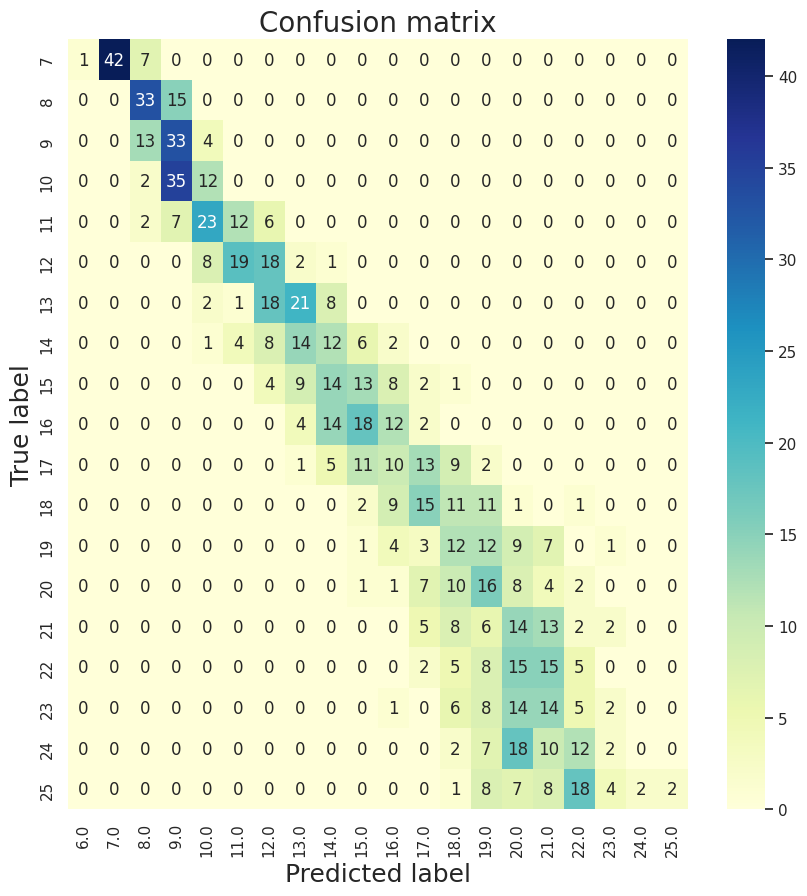

In [ ]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.3902439024390243
MSE: 3.8356309650053024
RMSE: 1.958476695037575


# Evaluate (7-15)

## confusion_matrix

In [ ]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.951229,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.140761,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.991600,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.082879,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.913235,7.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.752045,22.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.939955,21.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.699839,20.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.404106,21.0


In [ ]:
Under = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 15)]
Under

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.951229,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.140761,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.991600,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.082879,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.913235,7.0
...,...,...,...,...,...,...,...,...
920,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,11.822237,12.0
921,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,11.965073,12.0
922,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,13.800620,14.0
923,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,13.137465,13.0


In [ ]:
pred_under = np.array( Under['Predict_int'].tolist()) #แปลงเป็น array
act_under = np.array( Under['Age(year)'].tolist())

In [ ]:
pred_under

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  8.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  9.,  8.,
        8.,  8.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,
        9.,  8.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,
        8.,  9.,  9.,  8.,  8.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  8.,
        8.,  8.,  8., 10.,  9.,  9.,  8., 10.,  9., 10., 10.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,
        8.,  9.,  8.,  8.,  9.,  8.,  8.,  9.,  8.,  9.,  9.,  9.,  8.,
        8.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,
        9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9.,  8.,  9.,
        9.,  9.,  8.,  9.,  9., 10., 10.,  9.,  9., 10., 10., 10.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9

In [ ]:
act_under

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_under, pred_under )
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_under, pred_under))#performance

classifier accuracy = 44.24379232505643%
              precision    recall  f1-score   support

         6.0       0.00      0.00      0.00         0
         7.0       1.00      0.84      0.91        50
         8.0       0.58      0.69      0.63        48
         9.0       0.37      0.66      0.47        50
        10.0       0.24      0.24      0.24        49
        11.0       0.33      0.24      0.28        50
        12.0       0.33      0.38      0.35        48
        13.0       0.46      0.42      0.44        50
        14.0       0.34      0.26      0.29        47
        15.0       0.68      0.25      0.37        51
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0

    accuracy                           0.44       443
   macro avg       0.33      0.31      0.31       443
weighted avg       0.48      0.44      0.44       443



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

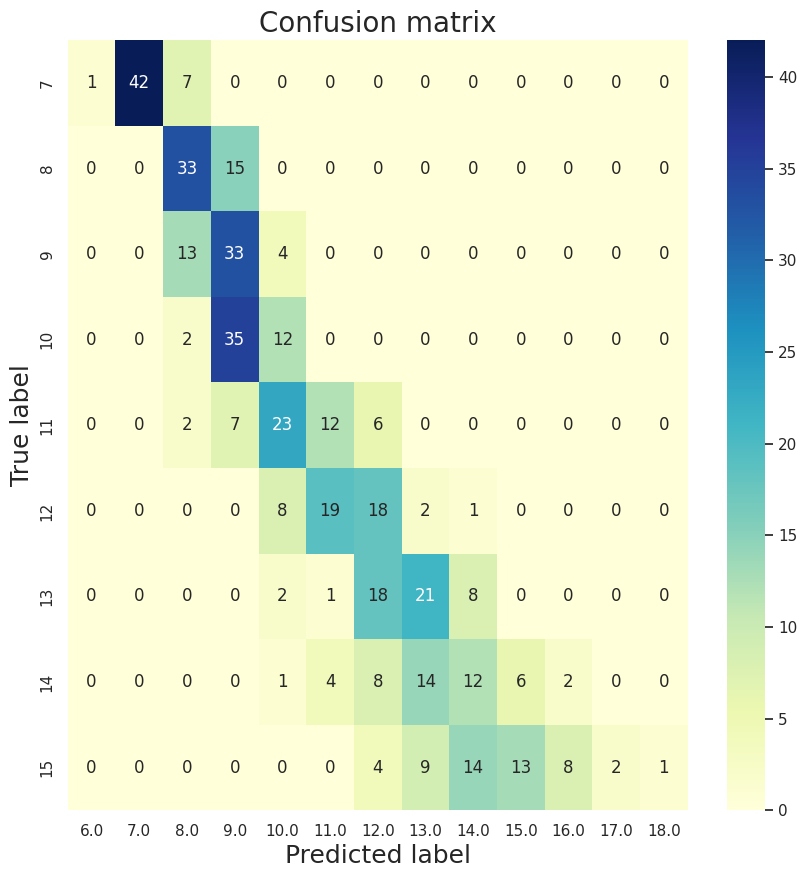

In [ ]:
#create CF
data = {'Actual': act_under,'Predicted' : pred_under }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_under, pred_under )

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_under,pred_under)
mse = mean_squared_error(act_under,pred_under)
rmse = mean_squared_error(act_under,pred_under,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.7133182844243793
MSE: 1.0970654627539504
RMSE: 1.0474089281431347


# Evaluate (16-25)

## confusion_matrix

In [ ]:
Upper = test[~test['Age(year)'].isin(Under['Age(year)'])]
Upper

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
426,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T159.jpg,14.514527,15.0
427,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT159.jpg,14.423979,14.0
428,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T177.jpg,15.882588,16.0
429,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT177.jpg,14.832946,15.0
430,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T178.jpg,14.139324,14.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.752045,22.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.939955,21.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.699839,20.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.404106,21.0


In [ ]:
pred_upper = np.array( Upper['Predict_int'].tolist()) #แปลงเป็น array
act_upper = np.array( Upper['Age(year)'].tolist())

In [ ]:
pred_upper

array([15., 14., 16., 15., 14., 15., 16., 15., 14., 13., 16., 15., 14.,
       14., 16., 17., 14., 14., 15., 15., 16., 15., 14., 16., 15., 15.,
       15., 15., 14., 15., 16., 16., 16., 14., 15., 16., 17., 16., 16.,
       15., 15., 14., 14., 15., 15., 13., 15., 14., 19., 18., 16., 16.,
       15., 15., 17., 16., 17., 18., 17., 18., 17., 16., 15., 14., 17.,
       17., 15., 14., 14., 16., 18., 17., 16., 16., 17., 16., 16., 18.,
       18., 17., 18., 19., 17., 17., 18., 18., 16., 15., 15., 14., 17.,
       17., 15., 15., 13., 15., 17., 17., 19., 16., 18., 16., 17., 19.,
       17., 18., 22., 18., 19., 18., 19., 17., 19., 19., 18., 17., 17.,
       18., 20., 18., 18., 15., 16., 16., 17., 19., 19., 17., 17., 16.,
       15., 18., 17., 16., 16., 17., 17., 16., 16., 18., 18., 19., 19.,
       17., 17., 19., 17., 18., 20., 18., 21., 19., 20., 20., 19., 18.,
       20., 20., 20., 18., 19., 19., 21., 20., 23., 19., 18., 15., 18.,
       16., 17., 18., 21., 21., 18., 19., 18., 19., 20., 19., 19

In [ ]:
act_upper

array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_upper, pred_upper)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_upper, pred_upper))#performance

classifier accuracy = 15.6%
              precision    recall  f1-score   support

        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.32      0.24      0.28        50
        17.0       0.28      0.25      0.27        51
        18.0       0.17      0.22      0.19        50
        19.0       0.15      0.24      0.19        49
        20.0       0.09      0.16      0.12        49
        21.0       0.18      0.26      0.21        50
        22.0       0.11      0.10      0.11        50
        23.0       0.18      0.04      0.07        50
        24.0       0.00      0.00      0.00        51
        25.0       1.00      0.04      0.08        50

    accuracy                           0.16       500
   macro avg       0.19      0.12      0.12       500
weighted avg       0.25      0.16      0.15       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

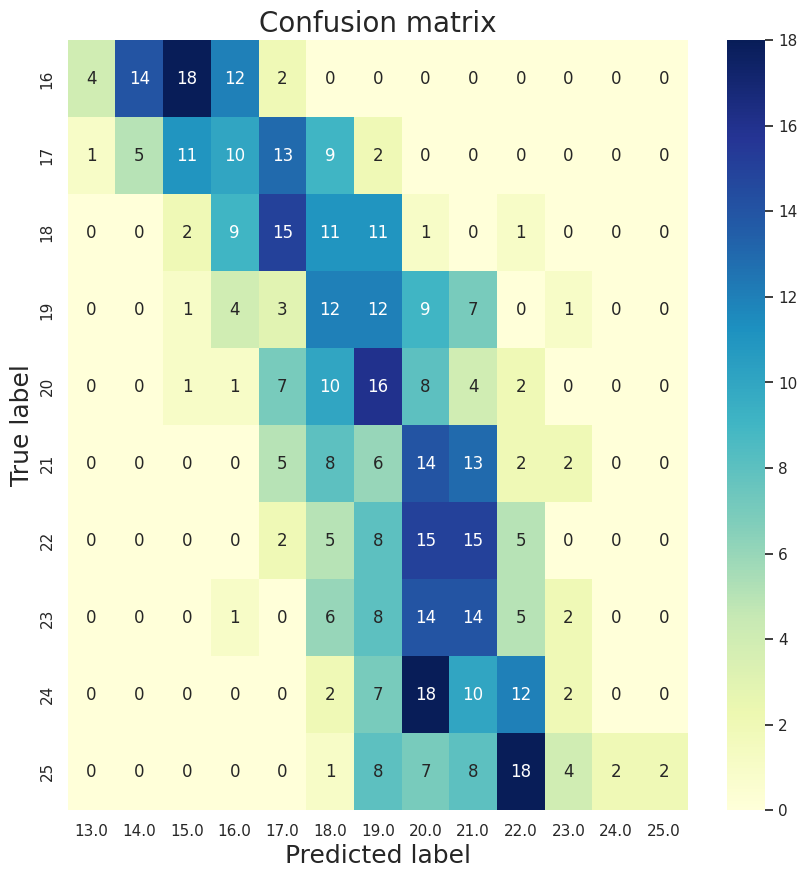

In [ ]:
#create CF
data = {'Actual': act_upper,'Predicted' : pred_upper}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_upper, pred_upper)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_upper,pred_upper)
mse = mean_squared_error(act_upper,pred_upper)
rmse = mean_squared_error(act_upper,pred_upper,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.99
MSE: 6.262
RMSE: 2.5023988491045945


# Evaluate Under-Upper

## confusion_matrix

In [ ]:
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.951229,7.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.140761,7.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.991600,7.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.082879,7.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.913235,7.0
...,...,...,...,...,...,...,...,...,...
938,938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.752045,22.0
939,939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.939955,21.0
940,940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.699839,20.0
941,941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.404106,21.0


In [ ]:
test.loc[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 15), 'age'] = '7 - 15 years'
test.loc[(test['Age(year)'] >= 16) & (test['Age(year)'] <= 25), 'age'] = '16 - 25 years'

In [ ]:
test.loc[(test['Predict_int'] >= 7) & (test['Predict_int'] <= 15), 'age_pred'] = '7 - 15 years'
test.loc[(test['Predict_int'] >= 16) & (test['Predict_int'] <= 25), 'age_pred'] = '16 - 25 years'

In [ ]:
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.951229,7.0,7 - 15 years,7 - 15 years
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,7.140761,7.0,7 - 15 years,7 - 15 years
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.991600,7.0,7 - 15 years,7 - 15 years
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,7.082879,7.0,7 - 15 years,7 - 15 years
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.913235,7.0,7 - 15 years,7 - 15 years
...,...,...,...,...,...,...,...,...,...,...,...
938,938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,21.752045,22.0,16 - 25 years,16 - 25 years
939,939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,20.939955,21.0,16 - 25 years,16 - 25 years
940,940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.699839,20.0,16 - 25 years,16 - 25 years
941,941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,21.404106,21.0,16 - 25 years,16 - 25 years


In [ ]:
test[test.isna().any(axis=1)]

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred
18,18,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V85.jpg,6.376177,6.0,7 - 15 years,NaN


In [ ]:
pred_age = np.array( test['age_pred'].tolist()) #แปลงเป็น array
act_age = np.array( test['age'].tolist())

In [ ]:
pred_age

array(['7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', 'nan', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 

In [ ]:
act_age

array(['7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
      

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_age, pred_age)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_age, pred_age))#performance

classifier accuracy = 92.47083775185578%
               precision    recall  f1-score   support

16 - 25 years       0.97      0.89      0.93       500
 7 - 15 years       0.88      0.97      0.92       443
          nan       0.00      0.00      0.00         0

     accuracy                           0.92       943
    macro avg       0.62      0.62      0.62       943
 weighted avg       0.93      0.92      0.93       943



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

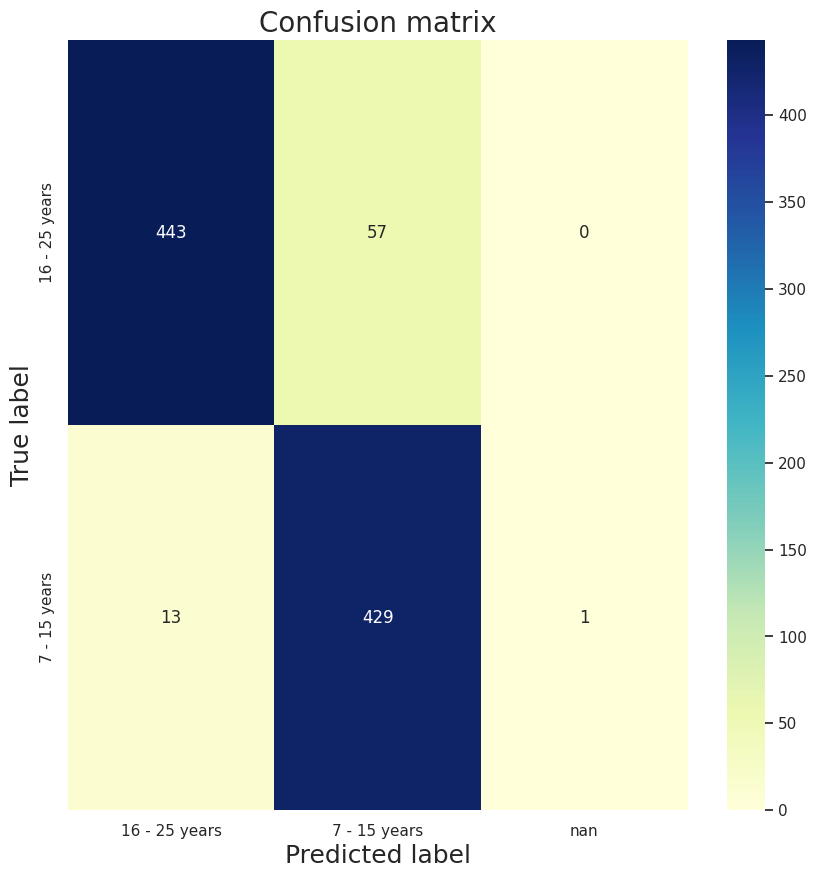

In [ ]:
#create CF
data = {'Actual': act_age,'Predicted' : pred_age}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_age, pred_age)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error

# mae = mean_absolute_error(act_age,pred_age)
# mse = mean_squared_error(act_age,pred_age)
# rmse = mean_squared_error(act_age,pred_age,squared=False)

# print("MAE:",mae)
# print("MSE:",mse)
# print("RMSE:",rmse)

ValueError: ignored